# Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

## Импорт библиотек и загрузка данных

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

pd.options.display.float_format = "{:.2f}".format

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 15)

# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/market_arrivals_ind.csv")

In [51]:
df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

In [3]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Оставим только данные по городу Бангалор

In [52]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [53]:
# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [6]:
ts.head()

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


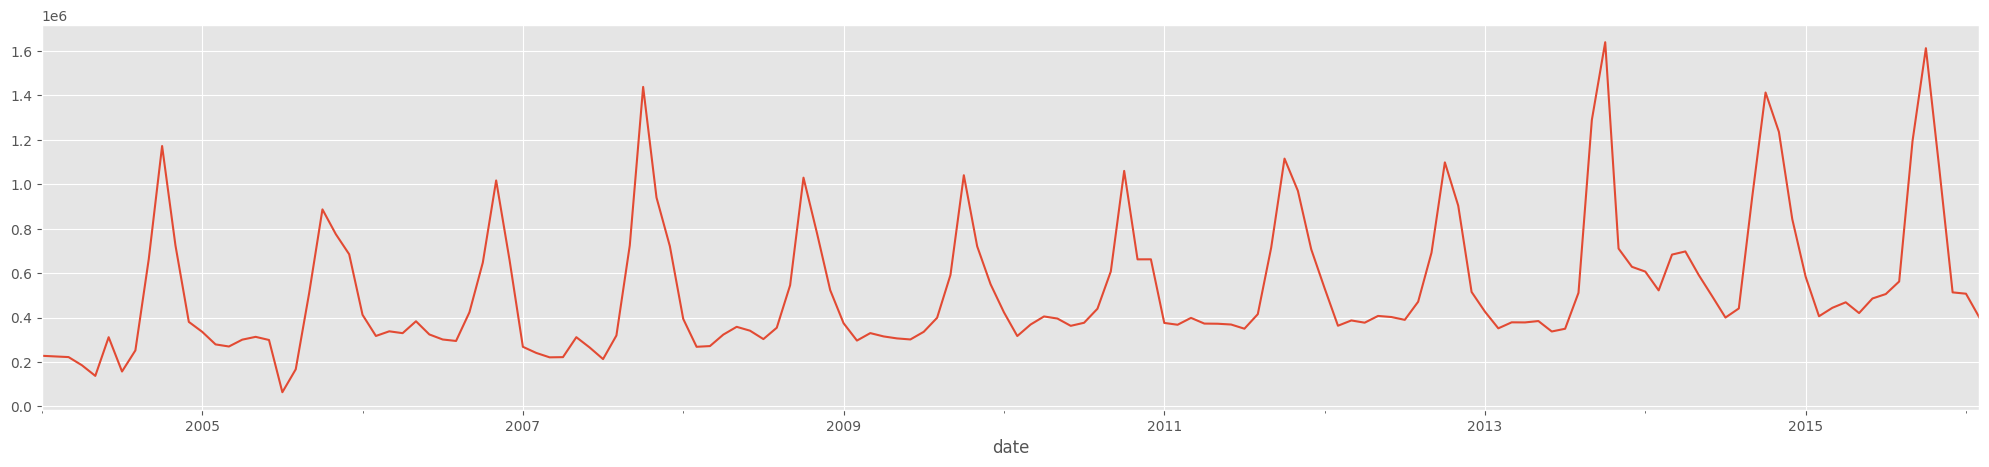

In [7]:
ts.quantity.plot(figsize=(25,5));

## Quiz

Примените критерий Дики-Фуллера

Есть ли в ряде единичные корни?

In [8]:
from statsmodels.tsa import stattools

def check_adf_stat(ts):
  df_stat = stattools.adfuller(ts)
  print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
        (df_stat[0], df_stat[1], df_stat[4]))

  if df_stat[0] > df_stat[4]['5%']:
      print('Есть единичные корни - ряд нестационарный')
  else:
      print('Единичных корней нет, ряд стационарен')

check_adf_stat(ts)

The Augmented Dickey-Fuller test statistic -0.878007, 
pvalue: 0.80
critical values: {'1%': -3.480500383888377, '5%': -2.8835279559405045, '10%': -2.578495716547007}
Есть единичные корни - ряд нестационарный


## Quiz

Примените kpss-тест

Является ли ряд стационарным?

In [9]:
from statsmodels.tsa.stattools import kpss

kpss_stat = stattools.kpss(ts)
print('The KPSS test statistic %f, \npvalue: %.3f \ntable distribution: %s' %
      (kpss_stat[0], kpss_stat[1], kpss_stat[3]))

if kpss_stat[0] > kpss_stat[3]['5%']:
    print('Отвергаем H0, значит, ряд нестационарный')
else:
    print('Ряд стационарный')

The KPSS test statistic 0.836230, 
pvalue: 0.010 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Отвергаем H0, значит, ряд нестационарный


<ipython-input-9-47d2b0467fad>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat = stattools.kpss(ts)


## Quiz

Найдите оптимальное $\lambda$ для преобразования Бокса-Кокса

(отрицательные значения говорят о том, что нужно просто логарифмировать ряд - в этом случае считайте, что $\lambda=0$)

Ответ при необходимости округлите до сотых.

In [13]:
from copy import deepcopy
from scipy import stats


print('optimal lambda:', stats.boxcox(ts['quantity'])[1])

optimal lambda: -0.037973926946732316


Примените преобразование Бокса-Кокса с найденным значением $\lambda$. Далее работайте с преобразованным рядом (и к исходному не возвращайтесь!)

In [30]:
ts

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390
...,...
2015-10,1612160
2015-11,1071872
2015-12,513186


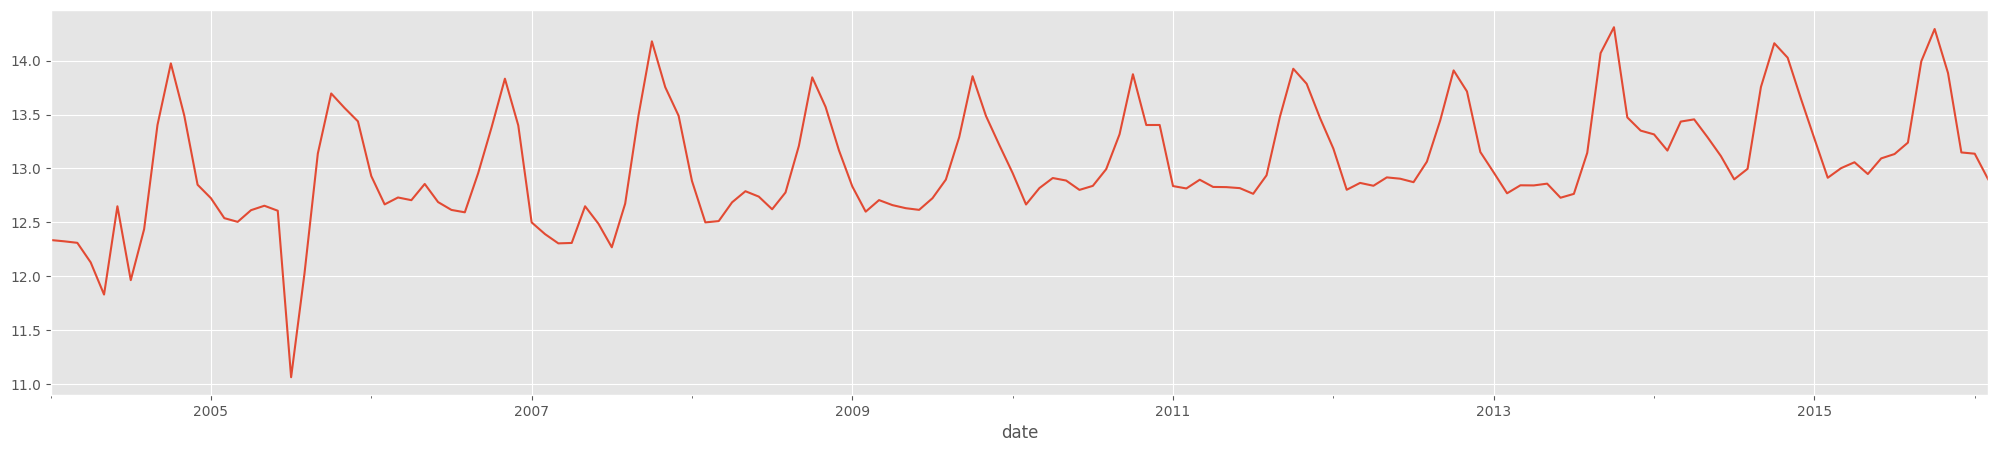

In [31]:
ts_boxcox = deepcopy(ts)

ts_boxcox['boxcox_quantity'] = np.log(ts['quantity'])
ts_boxcox['boxcox_quantity'].plot(figsize=(25,5));

## Quiz

Постройте измененный ряд. Стала ли дисперсия более однородной визуально?

In [ ]:
# ваш код здесь

## Quiz

Визуально в ряде есть небольшой возрастающий тренд.

Продифференцируйте ряд и примените к результату kpss-тест.

Стал ли ряд стационарным?

In [16]:
ts_boxcox.shift(1)

,quantity,boxcox_quantity
date,,
2004-01,NaN,NaN
2004-02,227832.00,9.85
2004-03,225133.00,9.84
2004-04,221952.00,9.83
2004-05,185150.00,9.72
...,...,...
2015-10,1194608.00,10.86
2015-11,1612160.00,11.03
2015-12,1071872.00,10.79


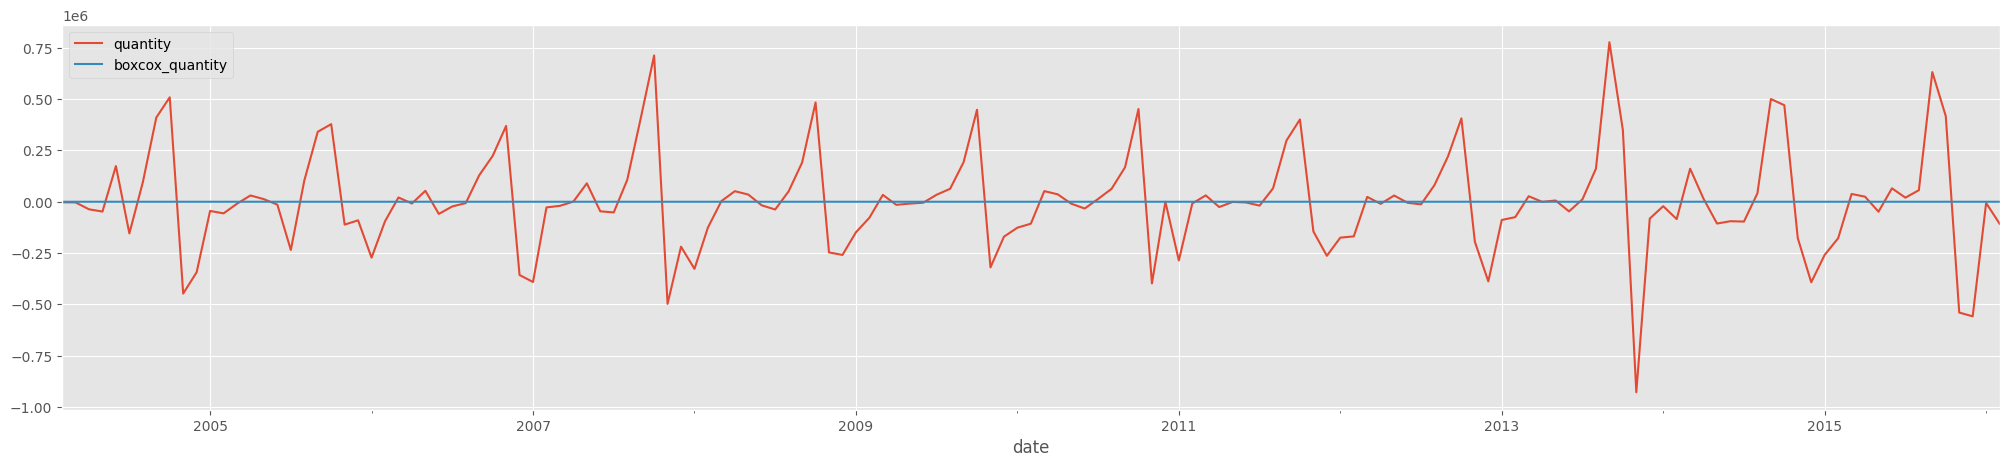

In [32]:
diff_ts = (ts_boxcox - ts_boxcox.shift(1))[1:]
diff_ts.plot(figsize=(25,5));

In [33]:
from statsmodels.tsa.stattools import kpss

kpss_stat = stattools.kpss(diff_ts['quantity'])
print('The KPSS test statistic %f, \npvalue: %.3f \ntable distribution: %s' %
      (kpss_stat[0], kpss_stat[1], kpss_stat[3]))

if kpss_stat[0] > kpss_stat[3]['5%']:
    print('Отвергаем H0, значит, ряд нестационарный')
else:
    print('Ряд стационарный')

The KPSS test statistic 0.188462, 
pvalue: 0.100 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Ряд стационарный


<ipython-input-33-1347473892df>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat = stattools.kpss(diff_ts['quantity'])


Для продифференцированного ряда постройте графики ACF и PACF.

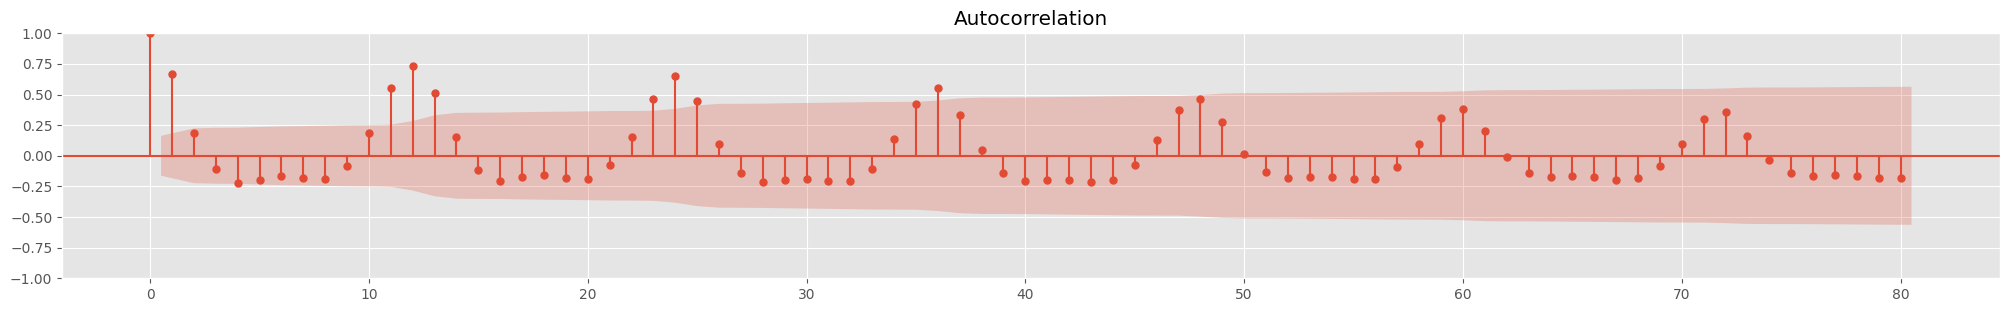

In [34]:
import statsmodels.api as sm

fig = plt.figure(figsize=(25,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_boxcox['quantity'][1:], lags=80, ax = ax1)

=> s=12

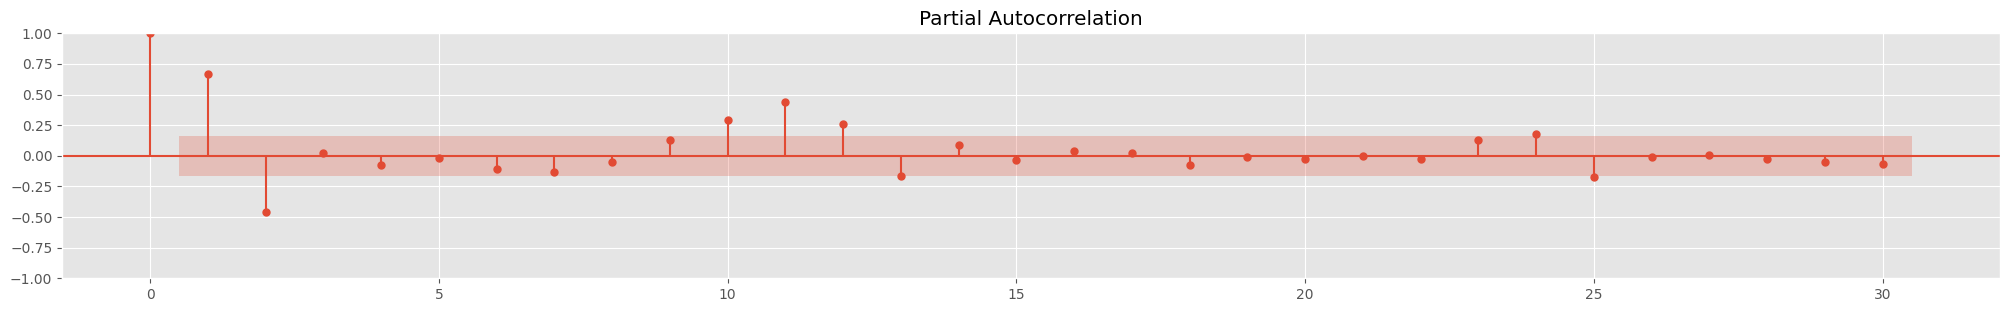

In [35]:
# import statsmodels.api as sm

fig = plt.figure(figsize=(25,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(ts_boxcox['quantity'][1:], lags=30, ax = ax1)

In [ ]:
# ваш код здесь

## Quiz

По построенным графикам определите значения $p$ и $q$ для модели ARIMA/SARIMAX.

В диапазоны значений входят все значения от 0 до максимального значимого лага за период (сам лаг периода уже не учитывается).

Подсказка: по графикам диапазоны значений $p$ и $q$ получаются одинаковыми. Чему равно максимальное значение из полученного диапазона.

p=11, q=11

## Обучение модели SARIMAX

Разобъем данные на train, val, test.

* train - первые 65% данных

* val - следующие 20% данных

* test - последние 15% данных

In [54]:
ts_boxcox = deepcopy(ts)
ts_boxcox['quantity'] = np.log(ts['quantity'])

In [55]:
train_length = int(len(ts) * 0.65)
val_length = int(len(ts) * 0.2)

train = ts_boxcox[:train_length]
val = ts_boxcox[train_length:train_length+val_length]
test = ts_boxcox[train_length+val_length:]

train.shape, val.shape, test.shape

((94, 1), (29, 1), (23, 1))

## Quiz

Среди найденных диапазонов $p$ и $q$ подберите оптимальную тройку $(p,d,q)$ ($d$ нашли выше, когда дифференцировали ряд и смотрели на результат) с помощью вложенного цикла.

В цикле обучайте модель SARIMAX на train и смотрите AIC на val.

In [56]:
p_values = range(0,12)
q_values = range(0,12)
d_values = range(0,2)

best_score, best_cfg = float("inf"), None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                model = sm.tsa.statespace.SARIMAX(train['quantity'], order=order, enforce_invertibility=True, enforce_stationarity=True).fit()
                y_hat = model.predict(start = val.index[0], end = val.index[-1])

                if model.aic < best_score:
                    best_score, best_cfg = model.aic, order
                    print('SARIMAX%s AIC=%.3f' % (order, model.aic))
            except:
                continue
print('Best SARIMAX%s AIC=%.3f' % (best_cfg, best_score))

SARIMAX(0, 0, 0) AIC=749.566
SARIMAX(0, 0, 1) AIC=627.876
SARIMAX(0, 0, 2) AIC=520.888


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 0, 3) AIC=431.815


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 0, 4) AIC=378.255


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 0, 5) AIC=321.986


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 0, 6) AIC=292.977


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 0, 7) AIC=259.232


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 0, 8) AIC=245.066


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 0, 9) AIC=242.442


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 0, 10) AIC=207.395


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 11) AIC=206.898
SARIMAX(0, 1, 0) AIC=102.548
SARIMAX(0, 1, 1) AIC=99.458
SARIMAX(0, 1, 3) AIC=81.951


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 6) AIC=81.139


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 7) AIC=65.710


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Like

SARIMAX(2, 1, 9) AIC=62.166


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py

SARIMAX(3, 1, 11) AIC=61.634


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/mod

SARIMAX(4, 1, 9) AIC=59.632


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py

SARIMAX(5, 1, 11) AIC=58.876


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stat

SARIMAX(6, 1, 6) AIC=53.695


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(6, 1, 8) AIC=45.491


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(6, 1, 9) AIC=39.725


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py

SARIMAX(8, 1, 11) AIC=39.061


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/mod

SARIMAX(11, 1, 3) AIC=38.390


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best SARIMAX(11, 1, 3) AIC=38.390


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Quiz

Обучите на train модель с найденными (p,d,q), выведите на экран AIC - ответ округлите до сотых.

In [57]:
model = sm.tsa.statespace.SARIMAX(train['quantity'], order=(11,1,3)).fit()
model.aic

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


38.39034866840777

Сделайте прогноз на **test**.

In [62]:
y_hat = model.predict(start=len(train)+len(val), end=(len(train)+len(val)+len(test)-1))
# y_hat

## Quiz

Нарисуйте правильный ответ на test и прогноз на test. Вычислите RMSE на test. Ответ округлите до сотых.

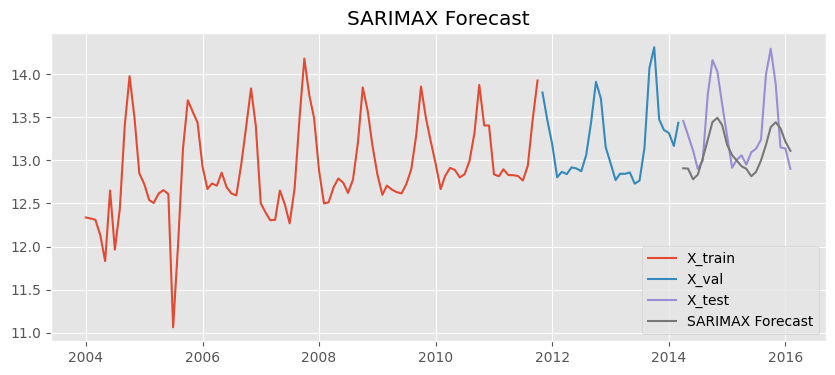

In [63]:
plt.figure(figsize=(10,4))
plt.plot(train.index.to_timestamp(), train['quantity'].values, label='X_train')
plt.plot(val.index.to_timestamp(), val['quantity'].values, label='X_val')
plt.plot(test.index.to_timestamp(), test['quantity'].values, label='X_test')
plt.plot(test.index.to_timestamp(), y_hat, label='SARIMAX Forecast')
plt.legend(loc='best')
plt.title('SARIMAX Forecast')
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error

print('RMSE = %.3f' % mean_squared_error(test, y_hat) ** 0.5)

RMSE = 0.403


По графикам ACF и PACF определите примерные диапазоны для P и Q, найдите S.

Нулевые значения также рассматривайте.

Зафиксируйте найденные ранее (p,d,q). Подберите в цикле аналогично подбору для $p, q$ оптимальные значения из найденных диапазонов.

D перебирайте в диапазоне {0, 1}.

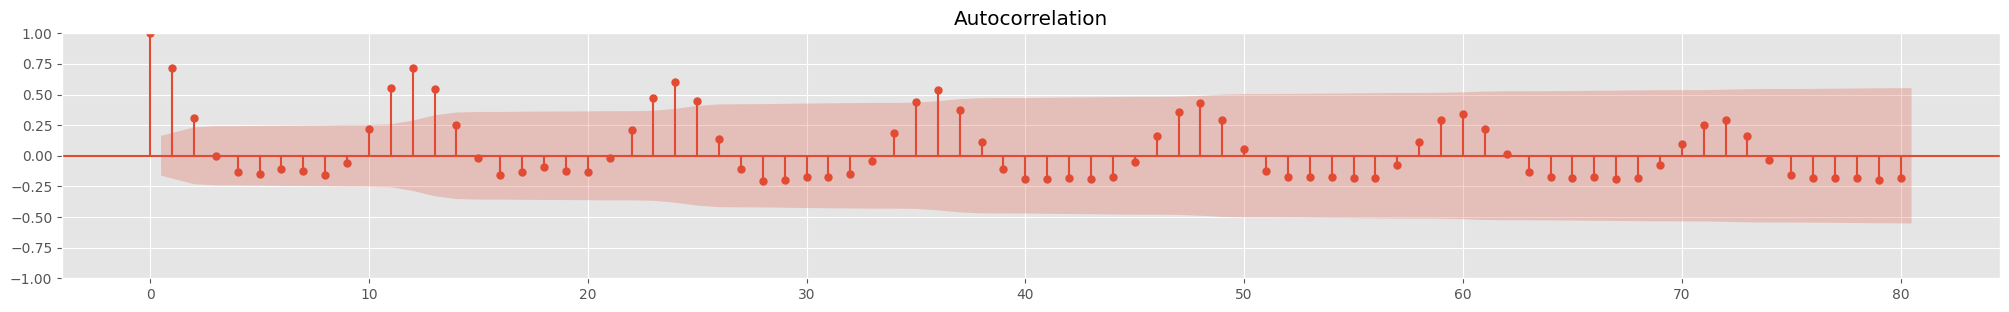

In [65]:
fig = plt.figure(figsize=(25,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_boxcox, lags=80, ax = ax1)

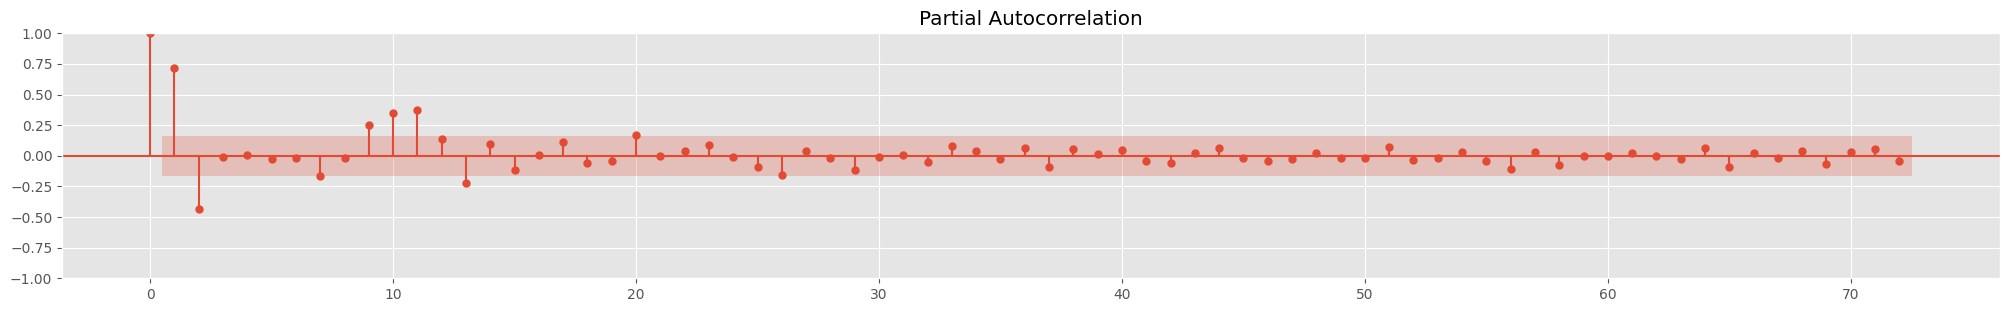

In [66]:
fig = plt.figure(figsize=(25,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(ts_boxcox, lags=72, ax = ax1)

In [67]:
best_score, best_cfg = float("inf"), None
P = 1
Q = 3
D = 1

for P_try in range(P+1):
  for Q_try in range(Q+1):
      for D_try in range(D+1):
        model = sm.tsa.statespace.SARIMAX(train['quantity'], order=(11,1,3), seasonal_order=(P_try, D_try, Q_try, 12)).fit()
        y_hat = model.predict(start=len(train), end=(len(train)+len(val)-1))

        if model.aic < best_score:
          best_score = model.aic
          print('P = %.3f, Q = %.3f, D = %.3f' % (P_try, Q_try, D_try))
          print('SARIMAX AIC=%.3f' % best_score)
          print('RMSE: ', mean_squared_error(val['quantity'], y_hat) ** 0.5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


P = 0.000, Q = 0.000, D = 0.000
SARIMAX AIC=38.390
RMSE:  0.2523098795447121


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conver

P = 0.000, Q = 1.000, D = 1.000
SARIMAX AIC=23.623
RMSE:  0.21188059663124828


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sar


Обучите на train модель с найденными (p,d,q), (P,D,Q,S),выведите на экран AIC - ответ округлите до сотых.

Сделайте прогноз на test.

In [68]:
model = sm.tsa.statespace.SARIMAX(train['quantity'], order=(11,1,3), seasonal_order=(0,1,1,12)).fit()
model.aic

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


23.62308597935037

In [69]:
y_hat = model.predict(start=len(train)+len(val), end=len(train)+len(val)+len(test)-1)

## Quiz

Нарисуйте правильный ответ на test и прогноз на test. Вычислите RMSE на test. Ответ округлите до сотых.

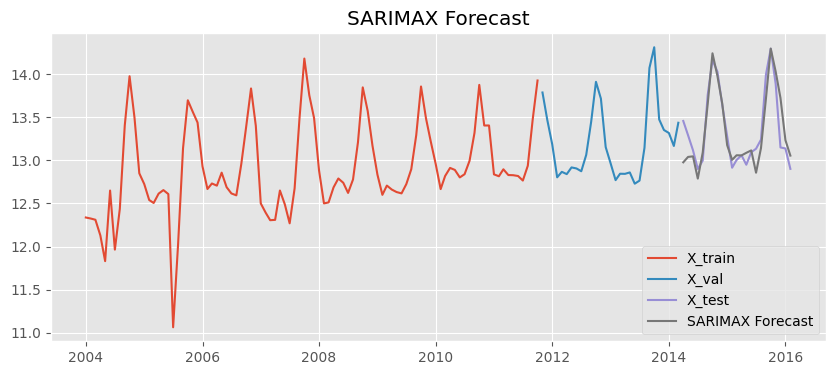

In [70]:
plt.figure(figsize=(10,4))
plt.plot(train.index.to_timestamp(), train['quantity'].values, label='X_train')
plt.plot(val.index.to_timestamp(), val['quantity'].values, label='X_val')
plt.plot(test.index.to_timestamp(), test['quantity'].values, label='X_test')
plt.plot(test.index.to_timestamp(), y_hat, label='SARIMAX Forecast')
plt.legend(loc='best')
plt.title('SARIMAX Forecast')
plt.show()

In [71]:
print('RMSE = %.3f' % mean_squared_error(test['quantity'], y_hat) ** 0.5)

RMSE = 0.201


## Quiz

Удалось ли добиться с помощью настройки гиперпараметров SARIMAX модели с хорошей предсказательной силой?

## Бонус (не проверяется)

Попробуйте добавить экзогенных факторов в модель

In [ ]:
# ваш код здесь